<a href="https://colab.research.google.com/github/Manojkdara/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

url = 'https://raw.githubusercontent.com/Manojkdara/Customer-Segmentation/main/Mall_Customers.csv?token=GHSAT0AAAAAAB5OV53BFW6JUGAHWMZ4PEHEY6B3JUQ'
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


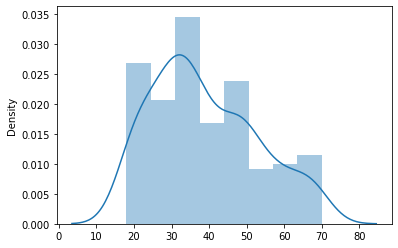

In [3]:
sns.distplot([df['Age']])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


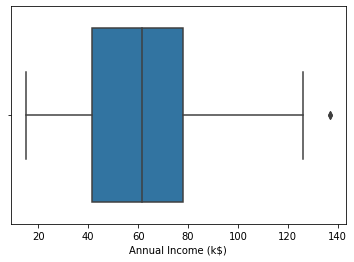

In [4]:
sns.boxplot(df['Annual Income (k$)'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


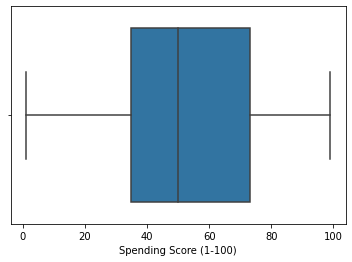

In [5]:
sns.boxplot(df['Spending Score (1-100)'])

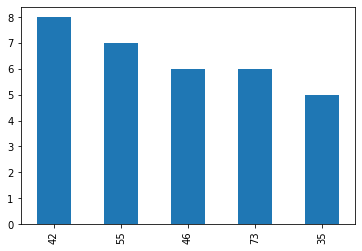

In [6]:
# Spending scores 

df['Spending Score (1-100)'].value_counts().head(5).plot(kind='bar')

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

kmeans= KMeans(n_clusters=5)
kmeans

KMeans(n_clusters=5)

In [8]:
y_predict=kmeans.fit(df.iloc[:,2:])
y_predict

KMeans(n_clusters=5)

In [9]:
df["Cluster"]=y_predict.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


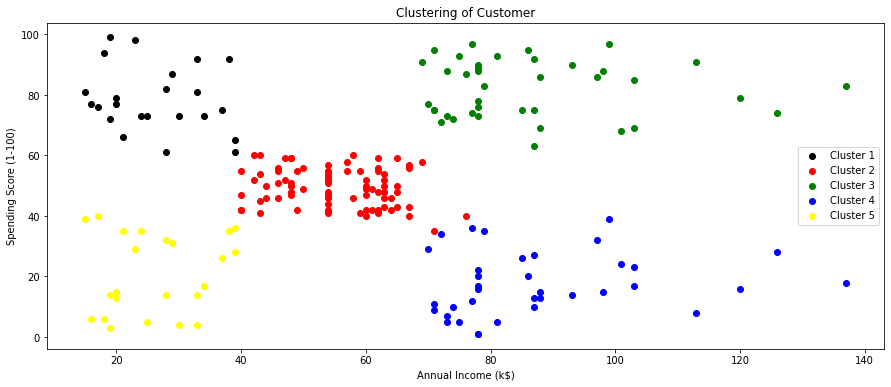

In [10]:
cluster1 = df[df["Cluster"]==0]
cluster2 = df[df["Cluster"]==1]
cluster3 = df[df["Cluster"]==2]
cluster4 = df[df["Cluster"]==3]
cluster5 = df[df["Cluster"]==4]


plt.figure(figsize=(15,6))
plt.scatter(cluster1['Annual Income (k$)'],cluster1['Spending Score (1-100)'],color='black' ,label='Cluster 1')
plt.scatter(cluster2['Annual Income (k$)'],cluster2['Spending Score (1-100)'],color='red'   ,label='Cluster 2')
plt.scatter(cluster3['Annual Income (k$)'],cluster3['Spending Score (1-100)'],color='green' ,label='Cluster 3')
plt.scatter(cluster4['Annual Income (k$)'],cluster4['Spending Score (1-100)'],color='blue'  ,label='Cluster 4')
plt.scatter(cluster5['Annual Income (k$)'],cluster5['Spending Score (1-100)'],color='yellow',label='Cluster 5')
plt.title('Clustering of Customer')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [11]:
X = df.iloc[:, [3, 4]].values

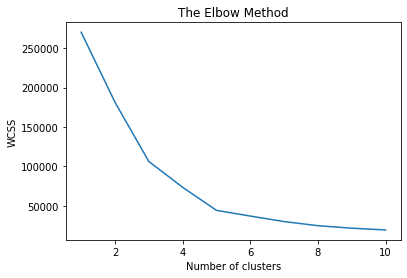

In [12]:
# elbow method to find the optimal number of clusters

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [13]:
# kmeans with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_predict = kmeans.fit_predict(X)



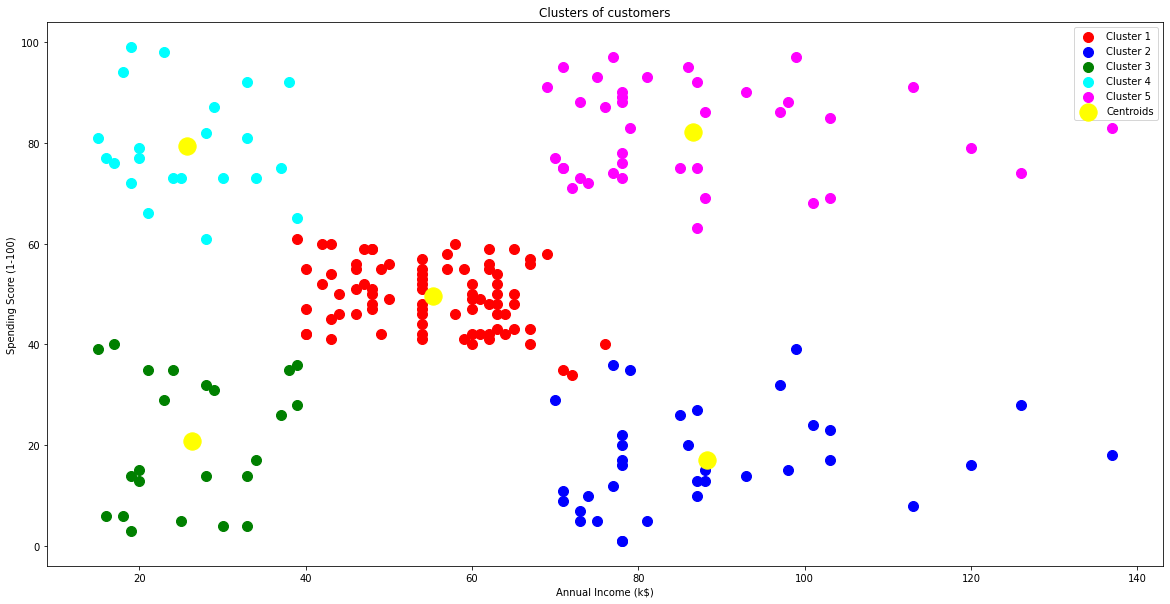

In [14]:
fig = plt.figure(figsize=(20,10))
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s = 100, c = 'red'    , label = 'Cluster 1')
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s = 100, c = 'blue'   , label = 'Cluster 2')
plt.scatter(X[y_predict == 2, 0], X[y_predict == 2, 1], s = 100, c = 'green'  , label = 'Cluster 3')
plt.scatter(X[y_predict == 3, 0], X[y_predict == 3, 1], s = 100, c = 'cyan'   , label = 'Cluster 4')
plt.scatter(X[y_predict == 4, 0], X[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

The Silhouette Coefficient is calculated using the mean intra-cluster distance ( a ) and the mean nearest-cluster distance ( b ) for each sample.

In [17]:
from sklearn.metrics import silhouette_score

silhouette_score_kmeans= silhouette_score(X,y_predict)
print(silhouette_score_kmeans)

0.553931997444648
